# example2
### 통신회사 고객 이탈 데이터 - 고객 이탈 여부 예측

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")

# 데이터 scaling
from sklearn.preprocessing import StandardScaler # 표준화

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split # train set / test set 분리

# 분류 SVM
from sklearn.svm import SVC
import sklearn

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data/통신고객이탈.csv", engine = "python")
df.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


### 데이터 설명
  
* CHURN [범주형, Binary] : 이탈여부(Active-유지,Churn-이탈)
* CUSTOMER_ID [범주형, Nominal] : 고객 ID
* GENDER [범주형, Binary] : 성별(F,M)
* AGE [연속형, interval] : 나이
* CHARGE_TYPE [범주형, Nominal] : 요금제
* HANDSET [범주형, Nominal] : 기종
* USAGE_BAND [범주형, Nominal] : 사용 대역폭
* SERVICE_DURATION [연속형, interval] : 사용기간
* DROPPED_CALLS [연속형, interval] : 콜 Drop 횟수
* PEAK_CALLS_NO [연속형, interval] : 피크타임 통화 횟수
* PEAK_CALLS_TIME [연속형, interval] : 피크타임 통화 시간
* WEEKEND_CALLS_NO [연속형, interval] : 주말 통화 수
* WEEKEND_CALLS_TIME [연속형, interval] : 주말 통화 시간
* TOTAL_CALLS_NO [연속형, interval] : 전체 통화 수
* TOTAL_CALLS_TIME [연속형, interval] : 전체 통화 시간

In [3]:
# Null 값 확인
df.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
df_y = df['CHURN']
x = df.drop('CHURN', axis = 1, inplace = False)

In [10]:
# 더미 변수 생성
df_x = pd.get_dummies(x)
df_x.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID_K100420,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,0,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# train set / test set 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
df_train_x.head()

train data size:(651, 963)
test data size:(279, 963)


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID_K100420,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
64,40,36.00,2,556,1436.4,8,74.0,736,1862.9,0,...,0,0,0,0,0,0,0,1,0,0
201,41,45.33,11,73,403.2,15,39.0,204,962.4,0,...,0,0,0,0,0,0,1,0,0,0
37,26,55.07,0,546,1228.2,0,0.0,588,1294.8,0,...,0,0,0,0,0,0,0,1,0,0
403,24,50.83,2,249,445.2,6,15.0,274,527.1,0,...,0,0,0,1,0,0,1,0,0,0
322,32,55.63,10,125,232.2,4,112.8,159,525.9,0,...,0,0,0,0,0,0,1,0,0,0


## SVC 모델 생성 - 기본 옵션으로 모델 생성

In [22]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.791
Accuracy on test set: 0.842


#### ㄴ 모델 정확도는 train 79.1%, test 84.2%

### 현재 생성된 SVC모델의 옵션 확인

In [24]:
svm_uncustomized

SVC(random_state=1234)

## SVC 모델 Parameter 변경 
### - C : 규제에 대한 강도 변경

In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# C: 규제(0.01, 0.1, 1, 10)
para_c = [10 ** c for c in range(-2, 8)]
# para_c = [0.1 * c for c in range(1, 10)] 
# C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C = v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c= pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy 
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.791,0.842
2,1.00,0.791,0.842
3,10.00,0.791,0.842
4,100.00,0.791,0.842
5,1000.00,0.810,0.846
6,10000.00,0.849,0.835
7,100000.00,0.939,0.839
8,1000000.00,0.995,0.839
9,10000000.00,1.000,0.821


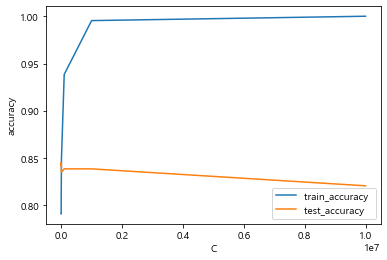

In [27]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_c, test_accuracy, linestyle = '-', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

###  Cost 지정

In [15]:
# C = 0.1
# C = 0.3
# C = 0.5
# C = 0.8
# C = 0.9
# C = 1.0

## SVC 모델 Parameter 변경 
### - Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [28]:
train_accuracy = []
test_accuracy=[]
para_gamma = [10 ** gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1000, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy 
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.8423
1,0.10,1.0,0.8423
2,1.00,1.0,0.8423
3,10.00,1.0,0.8423


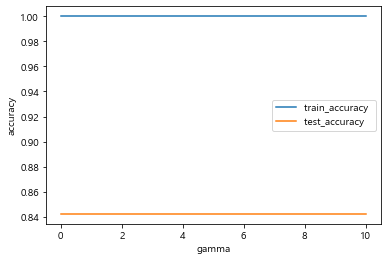

In [29]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_gamma, test_accuracy, linestyle = '-', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.legend()

#### ㄴ gamma 변화는 정확도에 영향을 미치지 않음
####      gamma 변화 구간을 변경해 정확도 확인 가능

## scale 변환 
### - StandardScaler : 설명변수 값의 구간을 동일하게 변경

In [30]:
# 변수명 저장
v_feature_name = df_test_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID_K100420,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424


In [31]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state=1234)
print("train data size:{}".format(df_scaled_train_x.shape))
print("test data size:{}".format(df_scaled_test_x.shape))
df_scaled_train_x.head()

train data size:(651, 963)
test data size:(279, 963)


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID_K100420,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
64,0.656147,0.118345,-0.193508,1.460175,1.432749,-0.494667,0.681142,1.560230,1.467105,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,-1.092427,1.709986,-0.360572,-0.046424
201,0.732453,0.776348,2.377387,-0.673327,-0.571954,-0.057841,-0.278129,-0.569516,-0.180203,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.584800,-0.360572,-0.046424
37,-0.412133,1.463266,-0.764818,1.416003,1.028781,-0.993897,-1.347031,0.967744,0.427865,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,-1.092427,1.709986,-0.360572,-0.046424
403,-0.564745,1.164238,-0.193508,0.104098,-0.490462,-0.619475,-0.935915,-0.289287,-0.976508,-0.032809,...,-0.455842,-0.109405,-0.104257,2.675424,-0.269563,-0.128037,0.915393,-0.584800,-0.360572,-0.046424
322,0.045701,1.502760,2.091732,-0.443633,-0.903743,-0.744282,1.744562,-0.749664,-0.978704,-0.032809,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.584800,-0.360572,-0.046424


## scale 조절 후 SVC 모델 재실행
### - scale이 조정된 데이터로 새로운 모델 생성

In [33]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print('Accuracy:{:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print('Confusion Matrix:{:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy:0.791
Confusion Matrix:0.842


## 새로운 SVC 모델 Parameter 변경
### - C : 규제에 대한 강도 변경

In [34]:
train_accuracy = []
test_accuracy=[]
para_c = [10 ** c for c in range(-2,2)]

for v_c in para_c:
    svm = SVC(C = v_c,random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c= pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy 

# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.791,0.842
2,1.00,1.000,0.842
3,10.00,1.000,0.842


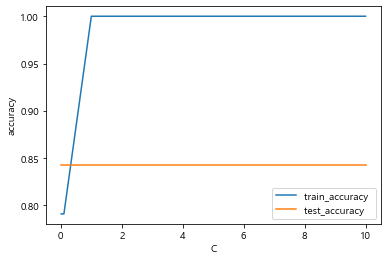

In [35]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_c, test_accuracy, linestyle = '-', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

#### ㄴ C가 1일 때 모델의 정확도가 많이 증가
#### ㄴ 필요시 C 변화 구간을 0.1 ~ 1.0 변경하여 정확도 확인 가능

In [37]:
# C = 0.1
# C = 0.5
# C = 1.0
# C = 10
# C = 100

## 새로운 SVC 모델 Parameter 변경
### - Gamma : 훈련 샘플이 미치는 영향의 범위 변경 결과

In [36]:
train_accuracy = []
test_accuracy=[]
para_gamma = [10 ** gamma for gamma in range(-2,5)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy 
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.791,0.842
2,1.00,0.791,0.842
3,10.00,0.791,0.842
4,100.00,0.791,0.842
5,1000.00,0.791,0.842
6,10000.00,0.791,0.842


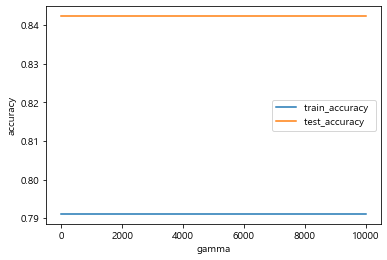

In [37]:
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_gamma, test_accuracy, linestyle = '-', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.legend()

In [47]:
# 임의로 지정
gamma = 0.1

## 결론 도출
### - 최종 모델 선택

In [38]:
# 최종 모델
svc_final = SVC(gamma = 0.1, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.842
Confusion matrix: 
[[235   0]
 [ 44   0]]


## 서포트 벡터 머신 Parameter 조정 - 추가
### GridSearchCV를 이용한 최적 parameter 찾기

In [39]:
estimator = SVC(random_state = 1234)

# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c, "gamma": para_gamma}

# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter model: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=0.01, gamma=0.01, random_state=1234)

best parameter model: 
{'C': 0.01, 'gamma': 0.01}

best score: 
0.791
